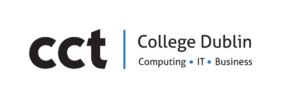

<div style="text-align: center;">
    <h2>Integrated CA</h2>
    <h2><u>Artificial Intelligence & Data Visualization and Communication</u></h1>
    <h3>Lecturers: David McQuaid and Sam Weiss</h3>
    <h3>Student Name: Danrlei da Silva Martins</h3>
    <h3>Student Number: 2020322</h3>
    <h3><a href="https://github.com/danrlei-martins-cct/AI_DV_Lv8_ICA">GitHub Repository</a></h3>
</div>

***

<h1> <u>Artificial Intelligence Tasks</u></h1>

<h3> Constraint Satisfaction Problem</h3>

Ciara is looking for employees for her new company, which develops and provides AI based logistic software for retailers. Ciara has determined that she needs:
- 2 Python Programmers
- 2 AI Engineers
- 1 Web Designer
- 1 Database Admin
- 1 Systems Engineer

Assume that if a person has two abilities, he or she can take on two roles in the company. So, Ciara narrowed down her selections to the following people:

<table>
    <tr>
        <th>Name</th>
        <th>Abilities</th>
    </tr>
    <tr>
        <td>Peter</td>
        <td>Python and AI</td>
    </tr>
    <tr>
        <td>Juan</td>
        <td>Web and AI</td>
    </tr>
    <tr>
        <td>Jim</td>
        <td>AI and Systems</td>
    </tr> 
    <tr>
        <td>Jane</td>
        <td>Python and Database</td>
    </tr>    
    <tr>
        <td>Mary</td>
        <td>Web and AI</td>
    </tr>    
    <tr>
        <td>Bruce</td>
        <td>Systems and Python</td>
    </tr>    
    <tr>
        <td>Anita</td>
        <td>Photoshop and AI</td>
    </tr>    
</table>

<h3> Scenario I </h3>

Suppose Ciara knows Python, and only has funds to hire three more people.

In [1]:
# Import library
from ortools.sat.python import cp_model

In [2]:
# Defining variables
names = ["Ciara", "Peter", "Juan", "Jim", "Jane", "Mary", "Bruce", "Anita"]

abilities = {
  "Ciara": ["Python"],
  "Peter": ["Python", "AI"],
  "Juan": ["Web", "AI"],
  "Jim": ["AI", "Systems"],
  "Jane": ["Python", "Database"],
  "Mary": ["Web", "Systems"],
  "Bruce": ["Systems", "Python"],
  "Anita": ["Web", "AI"]
}

In [3]:
# Helper functions (refactoring)
def print_solution(selected_team, solution_count):
    print(f"Solution {solution_count}:")
    print("Selected Team:", ', '.join(selected_team))
    print(f"Number of selected candidates: {len(selected_team)}\n")
    
def find_next_solution(model, solver, is_selected, names):
    selected_team = [name for name in names if solver.Value(is_selected[name]) == 1]
    # Exclude the current solution
    model.Add(sum(is_selected[name] for name in selected_team) < len(selected_team))
    try:
        status = solver.Solve(model)
        return status, selected_team
    except cp_model.SolverException as e:
        print(f"Error: {e}")
        return None, None

In [4]:
# Creating a constraint programming model
model = cp_model.CpModel()

# Role requirements
role_requirements = {
    "Python": 2,
    "AI": 2,
    "Web": 1,
    "Database": 1,
    "Systems": 1
}

# The number of people to be hired
hiring_max = 4

# Decision variables: 1 if person is selected, 0 otherwise
is_selected = {name: model.NewBoolVar(f"is_selected_{name}") for name in names}

# Constraint: Ciara is selected
model.Add(is_selected["Ciara"] == 1)

# Constraint: Each role needs to be covered
for role, count in role_requirements.items():
    model.Add(sum(is_selected[name] for name in names if role in abilities[name]) == count)

# Constraint: Select a maximum of 4 people
model.Add(sum(is_selected.values()) <= hiring_max)

# Solving the model
solver = cp_model.CpSolver()
status = solver.Solve(model)

# Displaying the solution or indicating if no solution is found
print("Scenario I Results\n")
if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
    solution_count = 0
    while True:
        selected_team = find_next_solution(model, solver, is_selected, names)
        if selected_team is None:
            break

        status, selected_team = selected_team
        solution_count += 1
        print_solution(selected_team, solution_count)
        
        # Break the loop if no more solutions
        if status != cp_model.OPTIMAL and status != cp_model.FEASIBLE:
            break
else:
    print("No solution found.")

Scenario I Results

Solution 1:
Selected Team: Ciara, Jim, Jane, Anita
Number of selected candidates: 4

Solution 2:
Selected Team: Ciara, Juan, Jim, Jane
Number of selected candidates: 4



***

<h3> Scenario II </h3>

Suppose Ciara and Juan become partners, with the additional funds they can now employ four more people but must employ another AI Engineer.

In [5]:
# Creating a constraint programming model
model = cp_model.CpModel()

# Role requirements
role_requirements = {
    "Python": 2,
    "AI": 3,
    "Web": 1,
    "Database": 1,
    "Systems": 1
}

# The number of people to be hired
hiring_max = 6

# Decision variables: 1 if person is selected, 0 otherwise
is_selected = {name: model.NewBoolVar(f"is_selected_{name}") for name in names}

# Constraint: Ciara and Juan are selected
model.Add(is_selected["Ciara"] == 1)
model.Add(is_selected["Juan"] == 1)

# Constraint: Each role needs to be covered
for role, count in role_requirements.items():
    model.Add(sum(is_selected[name] for name in names if role in abilities[name]) >= count)

# Constraint: Select a maximum of 6 people
model.Add(sum(is_selected.values()) <= hiring_max)

# Solving the model
solver = cp_model.CpSolver()
status = solver.Solve(model)

# Displaying the solution or indicating if no solution is found
print("Scenario II Results\n")
if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
    solution_count = 0
    while True:
        selected_team = find_next_solution(model, solver, is_selected, names)
        if selected_team is None:
            break

        status, selected_team = selected_team
        solution_count += 1
        print_solution(selected_team, solution_count)
        
        # Break the loop if no more solutions
        if status != cp_model.OPTIMAL and status != cp_model.FEASIBLE:
            break
else:
    print("No solution found.")

Scenario II Results

Solution 1:
Selected Team: Ciara, Peter, Juan, Jim, Jane
Number of selected candidates: 5

Solution 2:
Selected Team: Ciara, Juan, Jim, Jane, Anita
Number of selected candidates: 5

Solution 3:
Selected Team: Ciara, Peter, Juan, Jane, Bruce, Anita
Number of selected candidates: 6

Solution 4:
Selected Team: Ciara, Peter, Juan, Jane, Mary, Anita
Number of selected candidates: 6



***

<h2> Solving CSP with different algorithm</h2>

These problems be solved using several other algorithm’s we have studied in the module. Choose one of these algorithms and discuss your answer in detail including a proof of your hypothesis in code.

<h3> Solving CSP with Depth-First Search</h3>

In [6]:
class TeamBuilder:
    
    def __init__(self, names, abilities, role_requirements, hiring_max):
        self.names = names
        self.abilities = abilities
        self.role_requirements = role_requirements
        self.hiring_max = hiring_max
        self.solutions = []

    # Checks if adding a person to the current team satisfies the constraints
    def satisfies_constraints(self, person, current_roles, current_team, scenario):
        person_abilities = self.abilities[person]
        
        for ability in person_abilities:
            if ability in current_roles and current_roles[ability] > 0:
                if scenario == 1 and ("Ciara" in current_team or person == "Ciara"):
                    return True
                if scenario == 2 and ("Juan" in current_team or person == "Juan") and "Ciara" in current_team or person == "Ciara":
                    return True
        return False

    # Depth-first search to explore team-building possibilities
    def dfs(self, current_roles, current_team, scenario, queue):
        if len(current_team) == self.hiring_max:
            if all(value == 0 for value in current_roles.values()):
                sorted_team = sorted(list(current_team))
                if sorted_team not in self.solutions:
                    self.solutions.append(sorted_team)
            return
        
        for person in self.names:
            if person not in current_team and self.satisfies_constraints(person, current_roles, current_team, scenario):
                new_roles = current_roles.copy()
                for ability in self.abilities[person]:
                    if ability in new_roles and new_roles[ability] > 0:
                        new_roles[ability] -= 1
                        queue.append((new_roles, current_team | {person}, scenario))

    # Intiaties the team-building process by starting the DFS
    def hire_team(self, current_roles, current_team, scenario):
        queue = [(current_roles, current_team, scenario)]
        while queue:
            current_roles, current_team, scenario = queue.pop()
            self.dfs(current_roles, current_team, scenario, queue)

    # Prints the solutions if any, otherwise, prints a message
    def print_solutions(self):
        if self.solutions:
            print("Results:")
            for idx, team in enumerate(self.solutions, start=1):
                print(f"Solution {idx}: {', '.join(team)}")
        else:
            print("No solution found.")

In [7]:
names = ["Ciara", "Peter", "Juan", "Jim", "Jane", "Mary", "Bruce", "Anita"]
abilities = {
"Ciara": ["Python"],
"Peter": ["Python", "AI"],
"Juan": ["Web", "AI"],
"Jim": ["AI", "Systems"],
"Jane": ["Python", "Database"],
"Mary": ["Web", "Systems"],
"Bruce": ["Systems", "Python"],
"Anita": ["Web", "AI"]
}

# Scenario 1: Ciara knows Python and can hire 3 more people
role_requirements_scenario_i = {
"Python": 2,
"AI": 2,
"Web": 1,
"Database": 1,
"Systems": 1
}

team_builder = TeamBuilder(names, abilities, role_requirements_scenario_i, 4)
team_builder.hire_team(role_requirements_scenario_i, set(), scenario=1)
print("Scenario I")
team_builder.print_solutions()

# Scenario 2: Ciara and Juan are partners, can hire 4 more people but need one more AI engineer
role_requirements_scenario_ii = {
"Python": 2,
"AI": 3,
"Web": 1,
"Database": 1,
"Systems": 1
}

team_builder_scenario_ii = TeamBuilder(names, abilities, role_requirements_scenario_ii, 6)
team_builder_scenario_ii.hire_team(role_requirements_scenario_ii, set(), scenario=2)
print("\nScenario II")
team_builder_scenario_ii.print_solutions()

Scenario I
Results:
Solution 1: Anita, Ciara, Jane, Jim
Solution 2: Ciara, Jane, Jim, Juan

Scenario II
Results:
Solution 1: Anita, Bruce, Ciara, Jane, Jim, Juan
Solution 2: Anita, Bruce, Ciara, Jane, Juan, Peter
Solution 3: Anita, Ciara, Jane, Jim, Juan, Mary
Solution 4: Anita, Ciara, Jane, Juan, Mary, Peter
Solution 5: Anita, Ciara, Jane, Jim, Juan, Peter
Solution 6: Bruce, Ciara, Jane, Jim, Juan, Peter
Solution 7: Ciara, Jane, Jim, Juan, Mary, Peter


---

<h1> <u>Data Visualization Tasks</u></h1> 

Tasks include:
- Use appropriate visualisations to help communicate the CSP scenario and the corresponding solutions, if any, to the appropriate stakeholders.
- Create interactive visualisation(s) to allow a user to explore alternate constraint scenarios.


<h2> Visualizing CSP </h2>

In [ ]:
#pip install dash

In [8]:
# Import libraries
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.subplots as sp
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

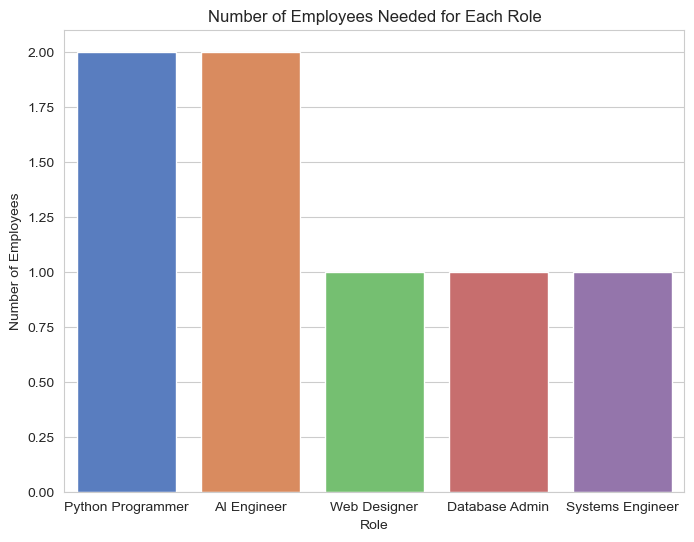

In [9]:
# Define the roles and number of employees needed
roles = ['Python Programmer', 'AI Engineer', 'Web Designer', 'Database Admin', 'Systems Engineer']
num_employees = [2, 2, 1, 1, 1]
# Create the bar chart
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
ax = sns.barplot(x=roles, y=num_employees, palette="muted")
ax.set_title("Number of Employees Needed for Each Role")
ax.set_xlabel("Role")
ax.set_ylabel("Number of Employees")
plt.show()

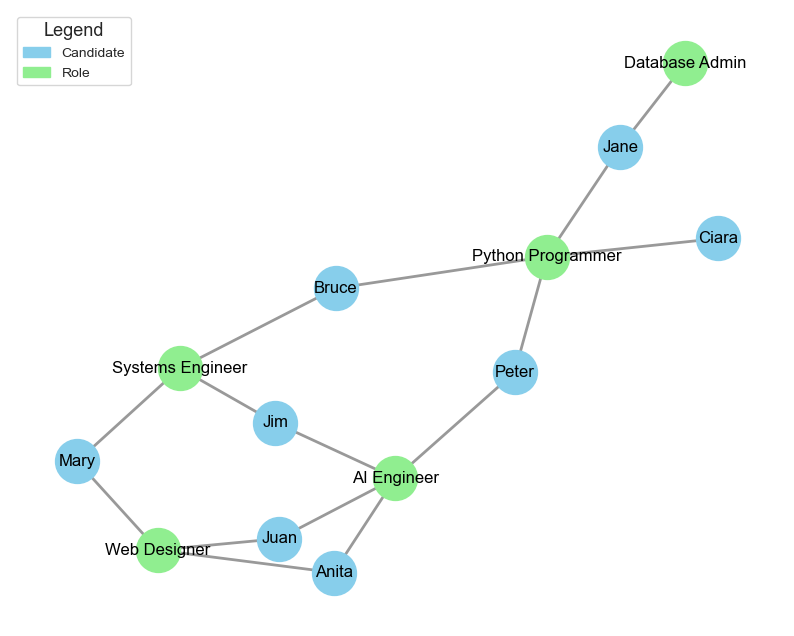

In [10]:
# Define the nodes (employees) and edges (abilities)
employees = ['Ciara', 'Peter', 'Juan', 'Jim', 'Jane', 'Mary', 'Bruce', 'Anita']
roles = ['Python Programmer', 'AI Engineer', 'Web Designer', 'Systems Engineer', 'Database Admin']
edges = [('Ciara', 'Python Programmer'), ('Peter', 'Python Programmer'), ('Peter', 'AI Engineer'), ('Juan', 'Web Designer'), ('Juan', 'AI Engineer'), 
         ('Jim', 'AI Engineer'), ('Jim', 'Systems Engineer'), ('Jane', 'Python Programmer'), ('Jane', 'Database Admin'), 
         ('Mary', 'Web Designer'), ('Mary', 'Systems Engineer'), ('Bruce', 'Systems Engineer'), ('Bruce', 'Python Programmer'), ('Anita', 'AI Engineer'), ('Anita', 'Web Designer')]

# Create the graph
G = nx.Graph()
G.add_nodes_from(employees)
G.add_nodes_from(roles)
G.add_edges_from(edges)

# Draw the graph
random_state = 37
pos = nx.spring_layout(G, seed=random_state)
plt.figure(figsize=(10, 8))

# Assign different colors to employee nodes and skill nodes
nx.draw_networkx_nodes(G, pos, nodelist=employees, node_color='skyblue', node_size=1000)
nx.draw_networkx_nodes(G, pos, nodelist=roles, node_color='lightgreen', node_size=1000)

nx.draw_networkx_edges(G, pos, width=2, alpha=0.8, edge_color='grey')
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

# Create legend
blue_patch = mpatches.Patch(color='skyblue', label='Candidate')
green_patch = mpatches.Patch(color='lightgreen', label='Role')
plt.legend(handles=[blue_patch, green_patch], title="Legend", title_fontsize='13', loc='upper left')

plt.axis('off')
plt.show()

<h3> Interactive Plot - Exploring Alternative Constraints </h3>

In [11]:
# Generic TeamBuilder class without hiring constraints
class TeamBuilder:
    
    def __init__(self, names, abilities, role_requirements, hiring_max):
        self.names = names
        self.abilities = abilities
        self.role_requirements = role_requirements
        self.hiring_max = hiring_max
        self.solutions = []
        self.team_sizes = []

    def satisfies_constraints(self, person, current_roles, current_team):
        person_abilities = self.abilities[person]
        
        for ability in person_abilities:
            if ability in current_roles and current_roles[ability] > 0:
                    return True
        return False

    def hire_team(self, current_roles, current_team):
        if len(current_team) == self.hiring_max:
            if all(value == 0 for value in current_roles.values()):
                sorted_team = sorted(list(current_team))
                if sorted_team not in self.solutions:
                    self.solutions.append(sorted_team)
                    self.team_sizes.append(len(sorted_team))
        
        for person in self.names:
            if person not in current_team and self.satisfies_constraints(person, current_roles, current_team):
                new_roles = current_roles.copy()
                for ability in self.abilities[person]:
                    if ability in new_roles and new_roles[ability] > 0:
                        new_roles[ability] -= 1
                        self.hire_team(new_roles, current_team | {person})

    def print_solutions(self):
        if self.solutions:
            print("Results:")
            for idx, team in enumerate(self.solutions, start=1):
                print(f"Solution {idx}: {', '.join(team)}")
        else:
            print("No solution found.")    

In [20]:
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Team Builder"),
    html.Label('Python'),
    dcc.Slider(
        id='python-slider',
        min=0,
        max=8,
        step=1,
        value=3,
    ),
    html.Label('AI'),
    dcc.Slider(
        id='ai-slider',
        min=0,
        max=8,
        step=1,
        value=3,
    ),
    html.Label('Web'),
    dcc.Slider(
        id='web-slider',
        min=0,
        max=8,
        step=1,
        value=2,
    ),
    html.Label('Database'),
    dcc.Slider(
        id='db-slider',
        min=0,
        max=8,
        step=1,
        value=1,
    ),
    html.Label('System'),
    dcc.Slider(
        id='system-slider',
        min=0,
        max=8,
        step=1,
        value=3,
    ),
    html.Label('Team Size'),
    dcc.Slider(
    id='team-size-slider',
    min=1,
    max=8,
    step=1,
    value=6,
    ),
    html.Button('Solve CSP', id='submit-button', n_clicks=0),
    dcc.Graph(id='result-graph')
])

@app.callback(
    Output('result-graph', 'figure'),
    [Input('submit-button', 'n_clicks')],
    [
        dash.dependencies.State('python-slider', 'value'),
        dash.dependencies.State('ai-slider', 'value'),
        dash.dependencies.State('web-slider', 'value'),
        dash.dependencies.State('db-slider', 'value'),
        dash.dependencies.State('system-slider', 'value'),
        dash.dependencies.State('team-size-slider', 'value')]
)
def update_graph(n_clicks, python_value, ai_value, web_value, db_value, system_value, team_size_value):
    # Create a new TeamBuilder instance with the slider values
    role_requirements = {
        "Python": python_value,
        "AI": ai_value,
        "Web": web_value,
        "Database": db_value,
        "Systems": system_value
    }
    
    # Predefined color palette for 8 team members
    color_palette = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']

    team_builder = TeamBuilder(names, abilities, role_requirements, team_size_value)
    team_builder.hire_team(role_requirements, set())

    # Check if solutions are found
    if not team_builder.solutions:
        return go.Figure(layout=go.Layout(title_text="No solutions found"))

    # Create sub-plots for each solution
    fig = sp.make_subplots(rows=len(team_builder.solutions), cols=1, subplot_titles=[f"Solution {i+1}" for i in range(len(team_builder.solutions))])

    # Iterate through each solution and add a trace for each team member
    for solution_idx, solution in enumerate(team_builder.solutions):
        # Create a trace for each team member in the solution
        for idx, person in enumerate(solution):
            color = color_palette[idx % len(color_palette)]  # Use a cyclic color assignment

            # Add a marker for each role of the person
            for role in abilities[person]:
                fig.add_trace(go.Scatter(
                    x=[person],
                    y=[role],
                    mode='markers',
                    marker=dict(size=10, color=color),
                    text=person,
                    legendgroup=f'Solution {solution_idx + 1}',  # Set the 'legendgroup' attribute
                    name=person  # Set the 'name' attribute to the individual's name
                ), row=solution_idx + 1, col=1)

        # Update legend with names of individual team members
        legend_items = [dict(label=person, color=color) for idx, person in enumerate(solution)]
        fig.update_layout(legend=dict(traceorder='reversed', itemsizing='constant', itemclick='toggleothers'), legend_tracegroupgap=10)
        fig.update_traces(showlegend=True, selector=dict(type='scatter'), legendgroup=f'Solution {solution_idx + 1}')

    # Update layout
    fig.update_layout(height=len(team_builder.solutions) * 200, width=800, showlegend=True, title_text="Possible Solutions")

    return fig
if __name__ == '__main__':
    app.run_server(debug=True)

---

<h2> GUI </h2>

- Create GUI(s) to allow a user to explore alternate constraint scenarios.

In [ ]:
# import library
from tkinter import ttk
import tkinter as tk